In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error


In [3]:
import pandas as pd
df=pd.read_csv(r"C:\Users\arunj\Desktop\Time Series Project\jupiter notebook\DollarFullDate.csv")
df

,Date,Dollar_Rate
0,"Dec 25, 2022",82.717
1,"Dec 18, 2022",82.780
2,"Dec 11, 2022",82.706
3,"Dec 04, 2022",82.410
4,"Nov 27, 2022",81.410
...,...,...
8387,"Jan 02, 1980",8.000
8388,"Dec 31, 1979",8.000
8389,"Dec 28, 1979",8.000
8390,"Dec 27, 1979",8.100


In [10]:
df = df[::-1]

In [11]:
# preprocess the dataset
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df = df.dropna()


In [12]:
# create train and test data
train_data = df[:int(0.8*len(df))]
test_data = df[int(0.8*len(df)):]


In [13]:
# scale the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)


In [14]:
# split data into X and y
X_train = []
y_train = []
for i in range(12, len(train_data)):
    X_train.append(train_data_scaled[i-12:i, :])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(12, len(test_data)):
    X_test.append(test_data_scaled[i-12:i, :])
    y_test.append(test_data_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)


In [15]:
# build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [16]:
# train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
419/419 [==============================] - 9s 10ms/step - loss: 0.0051
Epoch 2/100
419/419 [==============================] - 4s 10ms/step - loss: 4.1550e-05
Epoch 3/100
419/419 [==============================] - 4s 10ms/step - loss: 4.0595e-05
Epoch 4/100
419/419 [==============================] - 4s 10ms/step - loss: 4.4412e-05
Epoch 5/100
419/419 [==============================] - 5s 11ms/step - loss: 4.6492e-05
Epoch 6/100
419/419 [==============================] - 4s 11ms/step - loss: 4.9527e-05
Epoch 7/100
419/419 [==============================] - 5s 11ms/step - loss: 4.7678e-05
Epoch 8/100
419/419 [==============================] - 4s 10ms/step - loss: 5.3642e-05
Epoch 9/100
419/419 [==============================] - 4s 10ms/step - loss: 6.5108e-05
Epoch 10/100
419/419 [==============================] - 4s 10ms/step - loss: 5.4758e-05
Epoch 11/100
419/419 [==============================] - 4s 11ms/step - loss: 5.7921e-05
Epoch 12/100
419/419 [=======================

In [17]:
# make predictions on test data
y_pred = model.predict(X_test)


53/53 [==============================] - 2s 5ms/step


In [18]:
# # rescale the predictions and actual values
# y_pred_unscaled = scaler.inverse_transform(y_pred)
# y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))


In [19]:

# evaluate the model using root mean squared error
# rmse = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
# print("RMSE:", rmse)

In [20]:
# Evaluate the model on test data
mse= model.evaluate(X_test, y_test)
print(f"Mean squared error on test data: {mse:.4f}")

# Make predictions on test data
y_pred_lstm = model.predict(X_test)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

53/53 [==============================] - 1s 5ms/step - loss: 2.6974e-04
Mean squared error on test data: 0.0003
53/53 [==============================] - 0s 5ms/step


In [21]:
from sklearn.metrics import r2_score

print("The R2 Score of LSTM model is:",r2_score(y_pred_lstm,y_test)*100)

The R2 Score of LSTM model is: 99.63836480907386


In [22]:
X_test.shape

(1667, 12, 1)

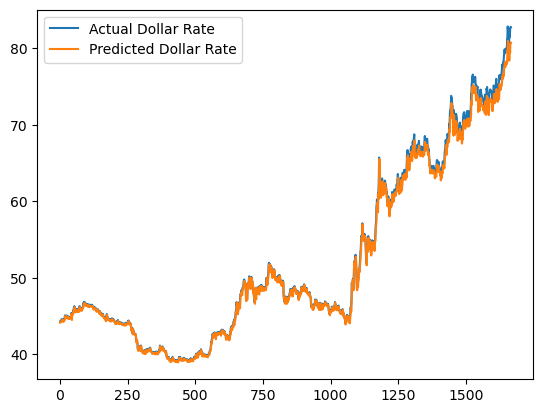

In [25]:
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual Dollar Rate')
plt.plot(y_pred_lstm, label='Predicted Dollar Rate')
plt.legend()
plt.show()

In [26]:
# # make predictions for the next 12 months
# future_dates = pd.date_range(df.index[-1], periods=12, freq='MS')[1:]
# future_dates_df = pd.DataFrame(index=future_dates, columns=df.columns)
# future_df = pd.concat([df, future_dates_df])

# future_df['scaled_Dollar_Rate'] = scaler.fit_transform(future_df[['Dollar_Rate']])
# X_future = []
# for i in range(len(future_df)-12, len(future_df)):
#     X_future.append(future_df.iloc[i-12:i, :])
# X_future = np.array(X_future)

# future_y_pred = model.predict(X_future)
# future_y_pred_unscaled = scaler.inverse_transform(future_y_pred)

# # print the predicted Dollar Rate for the next 12 months
# print(future_y_pred_unscaled[:, 0])

In [27]:
X_future.reshape(12,12,1)

NameError: name 'X_future' is not defined

In [28]:
test = X_test[-12:][1]

In [29]:
test = test.reshape(1,12,1)

In [30]:
pred_values = []
for i in range(5):
    predicted = model.predict(test)
    test = test[:,1:,:]
    test = np.append(test,predicted[-1,-1])
    pred_values.append(predicted[-1,-1])
    test = test.reshape(1,12,1)

1/1 [==============================] - 0s 25ms/step


In [31]:
pred_values = np.array(pred_values)
pred_values = scaler.inverse_transform(pred_values.reshape(-1,1))

In [32]:
pred_values

array([[80.16879],
       [77.87946],
       [75.85994],
       [74.20632],
       [72.81744]], dtype=float32)

In [33]:
predicted = scaler.inverse_transform(predicted)
predicted

array([[72.81744]], dtype=float32)

In [34]:
test = test[:,1:,:]
test

array([[[1.74056604],
        [1.74179971],
        [1.77963232],
        [1.78589744],
        [1.81761006],
        [1.80599903],
        [1.75347829],
        [1.69810033],
        [1.6492486 ],
        [1.60924828],
        [1.57565165]]])

In [35]:
test = np.append(test,20)

In [36]:
test

array([ 1.74056604,  1.74179971,  1.77963232,  1.78589744,  1.81761006,
        1.80599903,  1.75347829,  1.69810033,  1.6492486 ,  1.60924828,
        1.57565165, 20.        ])